In [1]:
# 3 Observations

# 1) The number of mice and gender of mice was fairly equally distributed between the 9 drug regimen and the placebo

#2) When you add timepoints into the mix, there are 2 drugs that mice appeared to live longer on (Capomulin and Ramicane)
#   and one that showed an obvious decrease in timepoints (Propriva) which may indicate that the mice did not live as long.

#3) with the r^2 value being 0.84. there definitely seems to be a positive correlation between average tumor size and weight in the mice 

In [2]:
# Dependencies

import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from pprint import pprint
from scipy.stats import linregress

In [3]:
# Import files

mouse_data_path = "data/Mouse_metadata.csv"
study_results_data = "data/Study_results.csv"

# Read into dataframes
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_data)


In [4]:
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Merge the datasets
merged_data = pd.merge(mouse_data, study_results, on = 'Mouse ID', how = 'left')
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#check for number of unique mice

unique_mouse_count = len(merged_data['Mouse ID'].unique())
print(f'There are {unique_mouse_count} unique mice listed in mouse_data' )

There are 249 unique mice listed in mouse_data


In [8]:
# check for duplicates based on Mouse ID and Timepoint

duplicate_rows = merged_data[merged_data.duplicated(["Mouse ID","Timepoint"])]

print(duplicate_rows)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [9]:
# create new clean dataframe by dropping mouse g989

clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Get a count of unique mouse IDs on the cleaned data set

clean_unique_mouse_count = len(clean_data["Mouse ID"].unique())
clean_unique_mouse_count

248

In [11]:
# create a summary table of  mean, median, variance, deviation and sem by treatment of tumor volume

Treatment_Group = clean_data.groupby(['Drug Regimen'])

tumor_mean = Treatment_Group['Tumor Volume (mm3)'].mean()
tumor_median = Treatment_Group['Tumor Volume (mm3)'].median()
tumor_variance = Treatment_Group['Tumor Volume (mm3)'].var()
tumor_deviation = Treatment_Group['Tumor Volume (mm3)'].std()
tumor_sem = Treatment_Group['Tumor Volume (mm3)'].sem()


Tumor_Summary = pd.DataFrame({'mean': tumor_mean,'median': tumor_median,'var':tumor_variance,'std':tumor_deviation, "sem":tumor_sem})

Tumor_Summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Creating datasets for bar and pie charts
# Grab mouse ID, sex, and drug treatment and get unique values

Mice = clean_data.loc[:,["Mouse ID","Drug Regimen","Sex"]]
Mice = Mice.drop_duplicates()

#Mice.head()
#Mice.count()

# Get counts by Drug Regimen and Gender respectively for use in graphing
Treatment_Count = Mice['Drug Regimen'].value_counts()
Gender_Count = Mice["Sex"].value_counts()

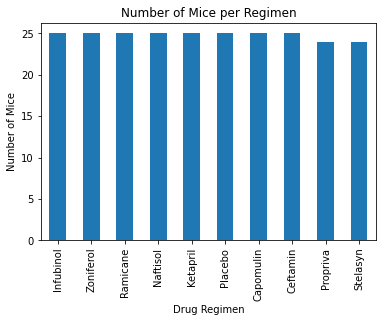

In [13]:
#I know that these do not match the graphs provided, i have provided those after this set of initial graphs. 
# We were asked to plot the number of mice per treatment, and if there are 248 unique mice, how can there be close to 200
# in just the first drug regimen? The graphs provided in the example is counting each timepoint for each drug regimen
# not each mouse per drug regimen.

# Bar chart plot using pandas DataFrame.plot() total mice by treatment
Treatment_Count.plot(kind = 'bar', title ="Number of Mice per Regimen",xlabel ="Drug Regimen",ylabel="Number of Mice") 


plt.show()


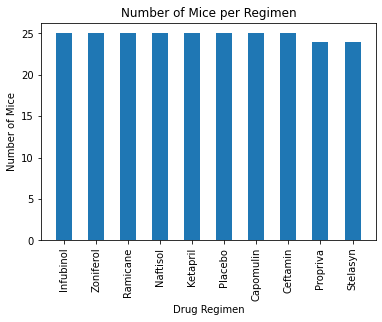

In [14]:
# Bar chart plot using matplotlib total mice by treatment

plt.bar(Treatment_Count.index, Treatment_Count,align = "center", width = .5)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.show()

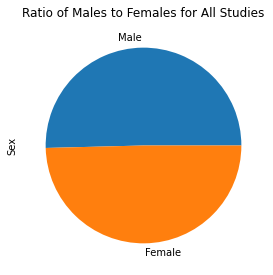

In [15]:
# Pie chart using Pandas showing distribution of female to male ratio

Gender_Count.plot(kind = "pie", title = "Ratio of Males to Females for All Studies", figsize = (4.5,4.5))

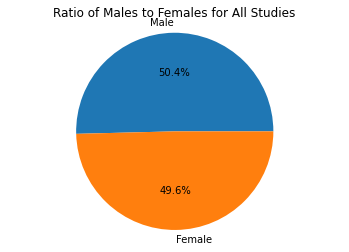

In [16]:
# Pie chart using matplotlib showing distribution of female to male ratio

plt.pie(Gender_Count, labels = Gender_Count.index, autopct="%1.1f%%")
plt.title("Ratio of Males to Females for All Studies")
plt.axis("equal")
plt.show()

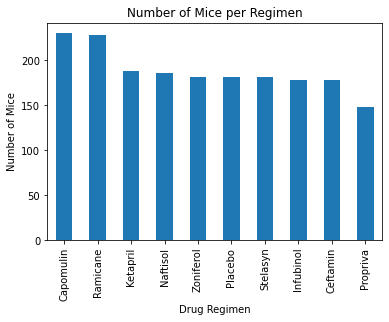

In [17]:
#Charts to match the ones in the example
# Get counts by Drug Regimen and Gender respectively for use in graphing
Mice_and_Timepoint = clean_data['Drug Regimen'].value_counts()
Gender_and_Timepoint= clean_data["Sex"].value_counts()

#Pandas bar chart
Mice_and_Timepoint.plot(kind = 'bar', title ="Number of Mice per Regimen",xlabel ="Drug Regimen",ylabel="Number of Mice") 

plt.show()

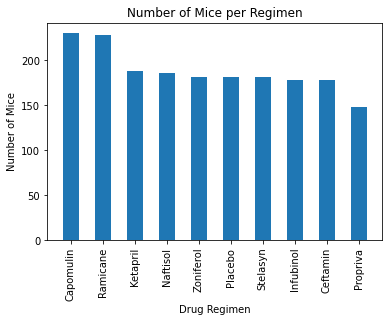

In [18]:
# Bar chart using Matplotlib

plt.bar(Mice_and_Timepoint.index, Mice_and_Timepoint,align = "center", width = .5)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.show()

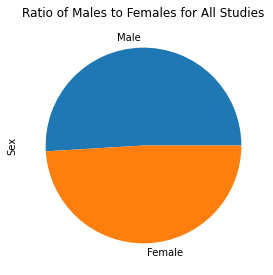

In [19]:
# pie chart using Pandas
Gender_and_Timepoint.plot(kind = "pie", title = "Ratio of Males to Females for All Studies",figsize = (4.5,4.5))

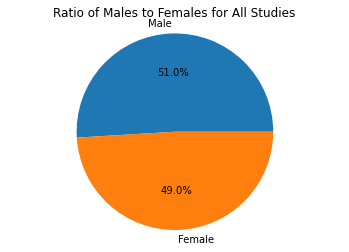

In [20]:
# Pie chart using matplotlib

plt.pie(Gender_and_Timepoint, labels = Gender_and_Timepoint.index, autopct="%1.1f%%")
plt.title("Ratio of Males to Females for All Studies")
plt.axis("equal")
plt.show()

In [21]:
# Get the last timepoint (greatest) for each mouse and use reset_index to return the series as a dataframe
Max_Time = clean_data.groupby("Mouse ID")['Timepoint'].max().reset_index()

In [22]:
# Merge Max_Time with the clean_data to get the tumor volume at the last timepoint
Last_Time_Data = clean_data.merge(Max_Time, on = ['Mouse ID', 'Timepoint'])

Last_Time_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
#Filter Last_Time_Data on just the 4 medicines of interest to create a dataframe of just those mice that took that drug regimen

Filtered_Last_Time_Data = Last_Time_Data[
    (Last_Time_Data["Drug Regimen"] == "Capomulin")|
    (Last_Time_Data["Drug Regimen"] == "Ramicane")|
    (Last_Time_Data["Drug Regimen"] == "Infubinol")|
    (Last_Time_Data["Drug Regimen"] == "Ceftamin")]

Filtered_Last_Time_Data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [24]:
# Create a dataframe for plotting from Filtered_Last_Time_Data and Tumor Volume

Final_Results = Filtered_Last_Time_Data.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
Final_Results




,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
234,Ceftamin,61.386660
236,Infubinol,67.685569
240,Ceftamin,68.594745
241,Ceftamin,64.729837


In [25]:
# Test for filtering code on drug regimen

#Test_Drug_df = Final_Results[Final_Results['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
#Test_Drug_df
# quartiles = Test_Drug_df.quantile([0.25,0.50,0.75])
# lowerq = quartiles[0.25]
# higherq = quartiles[0.75]
# mean = quartiles[0.50]
# iqr = higherq - lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = higherq - (1.5*iqr)
# print(f'For Ceftamin the lower quartile is {lowerq},the mean is {mean}, and the upper quartile is {higherq}.')
# print(f'For Ceftamin the lower bound is {lower_bound} and the upper bound is {upper_bound}')
# print(f'---------------------------------------------------------------------------------------------------')
# Final_Results.head()

In [26]:
# Create a list of 4 treatments that we want to focus on
Treatment_List = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# # Create a loop to run statistics on each drug and look for outliers
Final_Tumor_Vol = []

for treatment in Treatment_List:
    upper_out = []
    lower_out = []
    Tumor_by_Drug = Final_Results.loc[Final_Results['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    Final_Tumor_Vol.append(Tumor_by_Drug)
    quartiles = Tumor_by_Drug.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    mean = quartiles[0.50]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = higherq + (1.5*iqr)
     
    subset = Tumor_by_Drug.loc[(Tumor_by_Drug > upper_bound) | (Tumor_by_Drug < lower_bound)]
    
    print(f'For {treatment} the lower quartile is {lowerq.round()},the mean is {mean.round()}, and the upper quartile is {higherq.round()}.')
    print(f'For {treatment} the lower bound is {lower_bound.round()} and the upper bound is {upper_bound.round()}')
    
    if subset.empty == True:
        print('No obvious outliers'),
    else:
        print(f'These are the potential outliers for {treatment} : {subset.round()}')
        
    print(f'---------------------------------------------------------------------------------------------------')
          


For Capomulin the lower quartile is 32.0,the mean is 38.0, and the upper quartile is 40.0.
For Capomulin the lower bound is 21.0 and the upper bound is 52.0
No obvious outliers
---------------------------------------------------------------------------------------------------
For Ramicane the lower quartile is 32.0,the mean is 37.0, and the upper quartile is 41.0.
For Ramicane the lower bound is 18.0 and the upper bound is 54.0
No obvious outliers
---------------------------------------------------------------------------------------------------
For Infubinol the lower quartile is 54.0,the mean is 60.0, and the upper quartile is 66.0.
For Infubinol the lower bound is 37.0 and the upper bound is 83.0
These are the potential outliers for Infubinol : 74    36.0
Name: Tumor Volume (mm3), dtype: float64
---------------------------------------------------------------------------------------------------
For Ceftamin the lower quartile is 49.0,the mean is 60.0, and the upper quartile is 64.0.


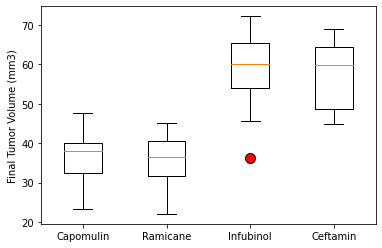

In [27]:
# Create box and whisker plots to display the for treatments we are focusing on
# use Final_Results and use Treatment_List for labels

outlier = dict(markerfacecolor='red', markersize=10)
plt.boxplot(Final_Tumor_Vol, labels=Treatment_List, flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

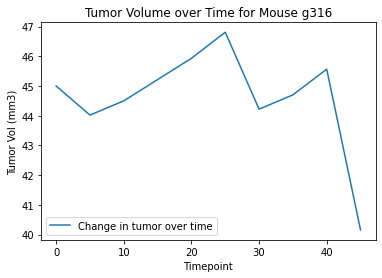

In [28]:
# Create a line graph that shows the tumor growth over time for one mouse (g316) taking Capomulin

mouse_g316_time = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data['Mouse ID'] == 'g316')]['Timepoint']
mouse_g316_tumor = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data['Mouse ID'] == 'g316')]['Tumor Volume (mm3)']
        
plt.plot(mouse_g316_time,mouse_g316_tumor)
plt.title('Tumor Volume over Time for Mouse g316')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Vol (mm3)')
plt.legend(['Change in tumor over time'], loc = 'lower left')
plt.show()

In [29]:
mouse_g316_time

351     0
352     5
353    10
354    15
355    20
356    25
357    30
358    35
359    40
360    45
Name: Timepoint, dtype: int64

In [30]:
mouse_g316_tumor

351    45.000000
352    44.022752
353    44.502042
354    45.216743
355    45.933322
356    46.809225
357    44.221480
358    44.702833
359    45.565821
360    40.159220
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Average Tumor Volume (mm3)')

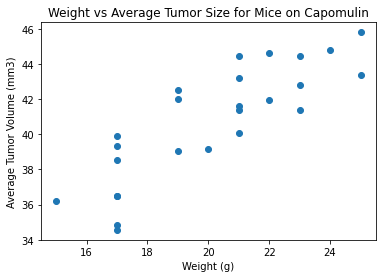

In [31]:
# Scatter plot tumor volume vs weight
# Filter mice by only those who received Capomulin
Treatment_Group = clean_data.loc[clean_data['Drug Regimen']=='Capomulin']

# Take the average
Avg_Tumor_Vol = Treatment_Group.groupby("Mouse ID").mean()

x_values = Avg_Tumor_Vol['Weight (g)']
y_values = Avg_Tumor_Vol["Tumor Volume (mm3)"]

# Create a scatter plot
plt.scatter(x_values, y_values)
plt.title('Weight vs Average Tumor Size for Mice on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

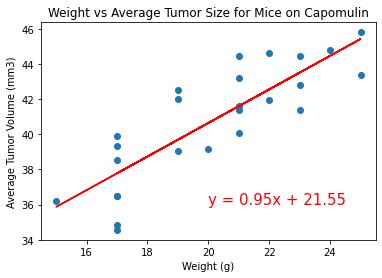

In [32]:
plt.scatter(Avg_Tumor_Vol['Weight (g)'], Avg_Tumor_Vol["Tumor Volume (mm3)"])
plt.title('Weight vs Average Tumor Size for Mice on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (20,36), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

plt.show()



In [33]:
rvalue**2

0.7088568047708717